In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("default")

In [2]:
df = pd.read_excel("piezo.xlsx")
df

,Load(KN),Voltage(V),Current(mA),Power(mW)
0,0,0.000,0.00,0.00
1,1,3.330,0.30,1.03
2,2,5.670,0.53,3.01
3,3,6.760,0.65,4.44
4,4,7.900,0.82,6.53
5,5,9.040,0.90,8.18
6,10,9.741,1.09,10.68
7,15,10.080,1.16,11.72
8,20,10.470,1.33,13.98
9,25,11.120,1.55,17.28


In [3]:
new_df = df.drop(["Power(mW)"], axis=1)
new_df.head()

,Load(KN),Voltage(V),Current(mA)
0,0,0.00,0.00
1,1,3.33,0.30
2,2,5.67,0.53
3,3,6.76,0.65
4,4,7.90,0.82


In [4]:
new_df["Power(mW)"] = df["Voltage(V)"] * df["Current(mA)"]
new_df.style.hide_index()
new_df.to_excel("Load Data.xlsx")

In [16]:
# plt.scatter(df["Load(KN)"], df["Avg. Values of Voltage(V)"], 
#             c="black", s=100, label="Avg. Values of Voltage(V)")
# plt.scatter(df["Load(KN)"], df["Avg. Values of Current(mA)"], 
#             c="tomato", s=100, label="Avg. Values of Current(mA)")

# plt.xlabel("Load(KN)")
# plt.ylabel("Average Values")

# plt.legend();

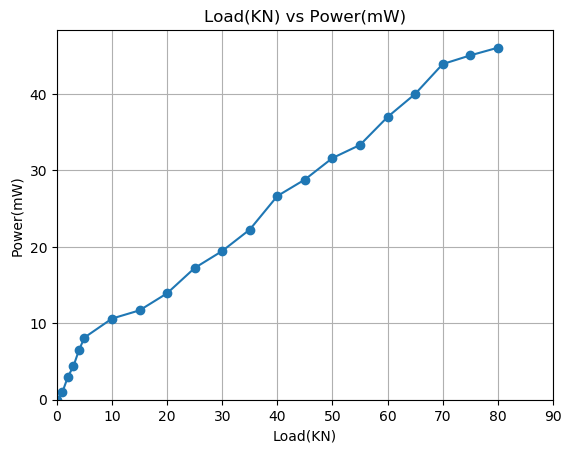

In [17]:
plt.plot(new_df["Load(KN)"], new_df["Power(mW)"], "-o")

plt.xlim(xmin=0, xmax=90)
plt.ylim(ymin=0)

plt.xlabel("Load(KN)")
plt.ylabel("Power(mW)")
plt.title("Load(KN) vs Power(mW)")
plt.grid();

In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
v = 10
-8.49944351e-09*(v**6) + 2.13482628e-06*(v**5) + -2.06589593e-04*(v**4) + 9.60437074e-03*(v**3) + -2.16004913e-01*(v**2) + 2.58243142e+00*v + 0

11.967280894489999

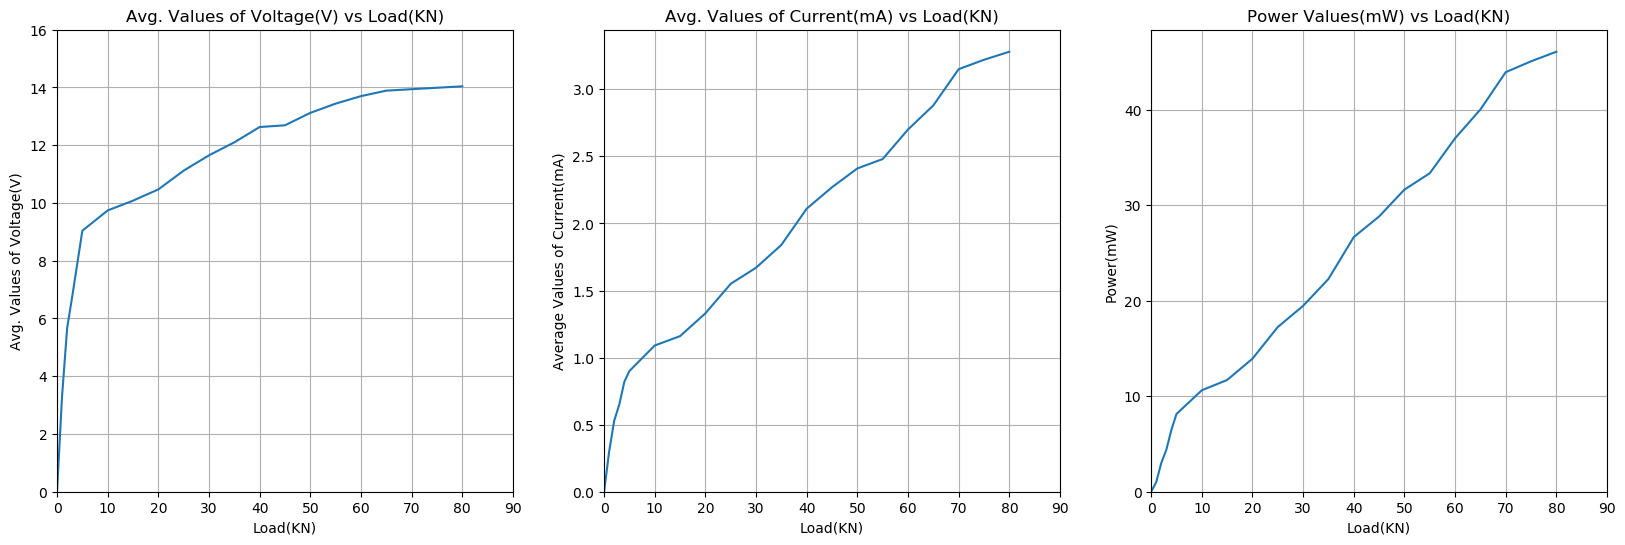

In [21]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# ax1
ax1.plot(new_df["Load(KN)"], new_df["Avg. Values of Voltage(V)"])
ax1.set(title="Avg. Values of Voltage(V) vs Load(KN)")
ax1.set(xlim=(0, 90), ylim=(0, 16))
ax1.set(xlabel="Load(KN)", ylabel="Avg. Values of Voltage(V)")
ax1.grid()

# ax2
ax2.plot(new_df["Load(KN)"], new_df["Avg. Values of Current(mA)"])
ax2.set(title="Avg. Values of Current(mA) vs Load(KN)")
ax2.set(xlim=(0, 90), ylim=0)
ax2.set(xlabel="Load(KN)", ylabel="Average Values of Current(mA)")
ax2.grid()

# ax3
ax3.plot(new_df["Load(KN)"], new_df["Power(mW)"])
ax3.set(title="Power Values(mW) vs Load(KN)")
ax3.set(xlim=(0, 90), ylim=0)
ax3.set(xlabel="Load(KN)", ylabel="Power(mW)")
ax3.grid();

## Volatge vs Load

co-ef:  [[ 0.00000000e+00  2.94855875e+00 -3.35327869e-01  1.84883860e-02
  -5.38869720e-04  8.54490959e-06 -6.96799803e-08  2.28697252e-10]]
rmse = 0.2610841707989183
R^2 = 0.9951629477000221


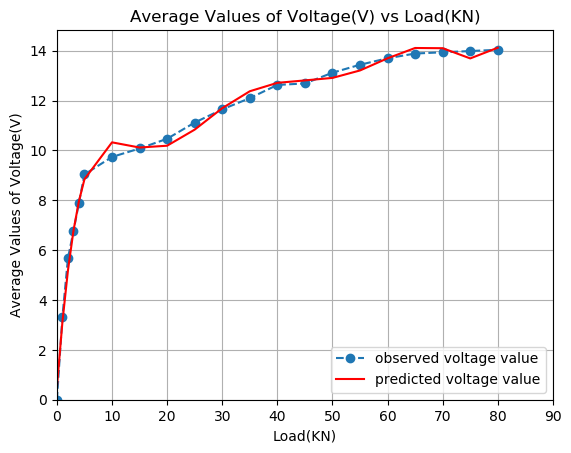

In [8]:
X = new_df["Load(KN)"].values.reshape(-1,1)
y = new_df["Voltage(V)"].values.reshape(-1,1)

# x_poly
poly_features = PolynomialFeatures(degree=7)
x_poly = poly_features.fit_transform(X)

# y_poly
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("co-ef: ", model.coef_)

# Draw
plt.plot(new_df["Load(KN)"], new_df["Voltage(V)"], "--o", label="observed voltage value")
plt.plot(X, y_poly_pred, color='r', label="predicted voltage value")

plt.xlim(xmin=0, xmax=90)
plt.ylim(ymin=0)

plt.xlabel("Load(KN)")
plt.ylabel("Average Values of Voltage(V)")
plt.title("Average Values of Voltage(V) vs Load(KN)")
plt.legend(loc="lower right")
plt.grid();

# print rmse, R^2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f"rmse = {rmse}")
print(f"R^2 = {r2}")

## Current vs Load

co-ef:  [[ 0.00000000e+00  2.90808434e-01 -3.06055605e-02  1.63715414e-03
  -4.52944291e-05  6.73053954e-07 -5.09365603e-09  1.53876502e-11]]
rmse = 0.034048284608862875
R^2 = 0.9988105298237135


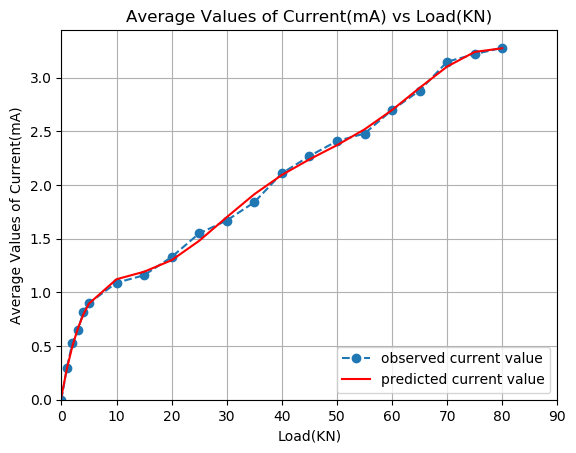

In [10]:
X = new_df["Load(KN)"].values.reshape(-1,1)
y = new_df["Current(mA)"].values.reshape(-1,1)

# x_poly
poly_features = PolynomialFeatures(degree=7)
x_poly = poly_features.fit_transform(X)

# y_poly
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("co-ef: ", model.coef_)

# Draw
plt.plot(new_df["Load(KN)"], new_df["Current(mA)"], "--o", label="observed current value")
plt.plot(X, y_poly_pred, color='r', label="predicted current value")

plt.xlim(xmin=0, xmax=90)
plt.ylim(ymin=0)

plt.xlabel("Load(KN)")
plt.ylabel("Average Values of Current(mA)")
plt.title("Average Values of Current(mA) vs Load(KN)")
plt.legend(loc="lower right")
plt.grid();

# print rmse, R^2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f"rmse = {rmse}")
print(f"R^2 = {r2}")

## Power vs Load

co-ef:  [[ 0.00000000e+00  2.50955347e+00 -2.29235471e-01  1.15616489e-02
  -2.96547342e-04  4.02741133e-06 -2.72923203e-08  7.14066093e-11]]
rmse = 0.48646211048684646
R^2 = 0.9989604449974604


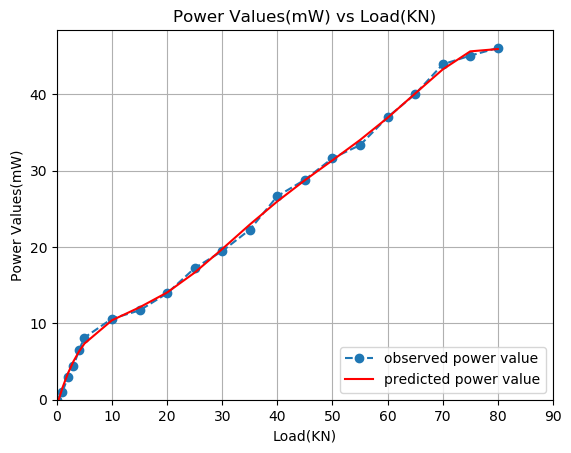

In [11]:
X = new_df["Load(KN)"].values.reshape(-1,1)
y = new_df["Power(mW)"].values.reshape(-1,1)

# x_poly
poly_features = PolynomialFeatures(degree=7)
x_poly = poly_features.fit_transform(X)

# y_poly
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("co-ef: ", model.coef_)

# Draw
plt.plot(new_df["Load(KN)"], new_df["Power(mW)"], "--o", label="observed power value")
plt.plot(X, y_poly_pred, color='r', label="predicted power value")

plt.xlim(xmin=0, xmax=90)
plt.ylim(ymin=0)

plt.xlabel("Load(KN)")
plt.ylabel("Power Values(mW)")
plt.title("Power Values(mW) vs Load(KN)")
plt.legend(loc="lower right")
plt.grid();

# print rmse, R^2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f"rmse = {rmse}")
print(f"R^2 = {r2}")

In [ ]:
pas = poly_features.fit_transform([[2*21.7]])
model.predict(pas)

In [ ]:
x = 0.49
1.444E-10*(x**7) - 4.910E-8*(x**6) + 6.636E-6*(x**5) - 4.556E-4*(x**4) + 0.017*(x**3) - 0.317*(x**2) + 3.154*x

In [30]:
data = {"vehicle": ["Motor Cycle", "Scooter", "Car", "Micro Bus", "Mini Bus", "Bus", "Truck", "Trailer", "Toll Free"],
        "Total amount(mW)": [2.304, 1.452, 43.453, 15.358, 43.453, 3340.828, 3422, 3952.243, 0.43],
       "% of volume": [.8325, 5.167, 13.425, 17.65, 9.55, 13.99, 33.33, 2.05, 4.04]}
calc = pd.DataFrame(data)
calc

,vehicle,Total amount(mW),% of volume
0,Motor Cycle,2.304,0.8325
1,Scooter,1.452,5.1670
2,Car,43.453,13.4250
3,Micro Bus,15.358,17.6500
4,Mini Bus,43.453,9.5500
5,Bus,3340.828,13.9900
6,Truck,3422.000,33.3300
7,Trailer,3952.243,2.0500
8,Toll Free,0.430,4.0400


In [118]:
def annual_generation(vehicle, year):
    calc[year] = vehicle*(calc["% of volume"]/100) * 0.127 * ((calc["Total amount(mW)"]/1000)*113970)

In [119]:
# year2021
annual_generation(48192013, "year2021")
calc

,vehicle,Total amount(mW),% of volume,year2021,year2022,year2023,year2024,year2025,year2026,year2027,year2028,year2029,year2030,year2031
0,Motor Cycle,2.304,0.8325,1.337938e+07,6.522405e+05,7.826886e+05,9.392263e+05,1.127072e+06,1.352486e+06,1.622983e+06,1.947580e+06,2.337096e+06,2.804515e+06,3.365418e+06
1,Scooter,1.452,5.1670,5.233285e+07,2.551209e+06,3.061451e+06,3.673742e+06,4.408490e+06,5.290188e+06,6.348225e+06,7.617870e+06,9.141445e+06,1.096973e+07,1.316368e+07
2,Car,43.453,13.4250,4.069147e+09,1.983696e+08,2.380435e+08,2.856522e+08,3.427826e+08,4.113392e+08,4.936070e+08,5.923284e+08,7.107941e+08,8.529529e+08,1.023543e+09
3,Micro Bus,15.358,17.6500,1.890814e+09,9.217654e+07,1.106118e+08,1.327342e+08,1.592811e+08,1.911373e+08,2.293647e+08,2.752377e+08,3.302852e+08,3.963422e+08,4.756107e+08
4,Mini Bus,43.453,9.5500,2.894626e+09,1.411121e+08,1.693345e+08,2.032014e+08,2.438417e+08,2.926100e+08,3.511320e+08,4.213584e+08,5.056301e+08,6.067561e+08,7.281073e+08
5,Bus,3340.828,13.9900,3.260177e+11,1.589326e+10,1.907191e+10,2.288629e+10,2.746354e+10,3.295625e+10,3.954750e+10,4.745701e+10,5.694841e+10,6.833809e+10,8.200571e+10
6,Truck,3422.000,33.3300,7.955815e+11,3.878433e+10,4.654120e+10,5.584944e+10,6.701933e+10,8.042320e+10,9.650784e+10,1.158094e+11,1.389713e+11,1.667655e+11,2.001186e+11
7,Trailer,3952.243,2.0500,5.651540e+10,2.755107e+09,3.306129e+09,3.967355e+09,4.760825e+09,5.712991e+09,6.855589e+09,8.226706e+09,9.872048e+09,1.184646e+10,1.421575e+10
8,Toll Free,0.430,4.0400,1.211767e+07,5.907325e+05,7.088790e+05,8.506548e+05,1.020786e+06,1.224943e+06,1.469931e+06,1.763918e+06,2.116701e+06,2.540042e+06,3.048050e+06


In [120]:
annual_generation(57830416, "year2022")
annual_generation(69396500, "year2023")
annual_generation(83275800, "year2024")
annual_generation(99930958, "year2025")
annual_generation(119917151, "year2026")
annual_generation(143900580, "year2027")
annual_generation(172680696, "year2028")
annual_generation(207216836, "year2029")
annual_generation(248660203, "year2030")
annual_generation(298392244, "year2031")
calc

,vehicle,Total amount(mW),% of volume,year2021,year2022,year2023,year2024,year2025,year2026,year2027,year2028,year2029,year2030,year2031
0,Motor Cycle,2.304,0.8325,1.337938e+07,1.605526e+07,1.926631e+07,2.311957e+07,2.774349e+07,3.329218e+07,3.995062e+07,4.794074e+07,5.752889e+07,6.903467e+07,8.284161e+07
1,Scooter,1.452,5.1670,5.233285e+07,6.279942e+07,7.535931e+07,9.043117e+07,1.085174e+08,1.302209e+08,1.562651e+08,1.875181e+08,2.250217e+08,2.700260e+08,3.240312e+08
2,Car,43.453,13.4250,4.069147e+09,4.882977e+09,5.859572e+09,7.031486e+09,8.437784e+09,1.012534e+10,1.215041e+10,1.458049e+10,1.749659e+10,2.099591e+10,2.519509e+10
3,Micro Bus,15.358,17.6500,1.890814e+09,2.268976e+09,2.722772e+09,3.267326e+09,3.920791e+09,4.704949e+09,5.645939e+09,6.775127e+09,8.130152e+09,9.756183e+09,1.170742e+10
4,Mini Bus,43.453,9.5500,2.894626e+09,3.473551e+09,4.168262e+09,5.001914e+09,6.002297e+09,7.202756e+09,8.643307e+09,1.037197e+10,1.244636e+10,1.493563e+10,1.792276e+10
5,Bus,3340.828,13.9900,3.260177e+11,3.912212e+11,4.694655e+11,5.633586e+11,6.760303e+11,8.112364e+11,9.734836e+11,1.168180e+12,1.401816e+12,1.682180e+12,2.018616e+12
6,Truck,3422.000,33.3300,7.955815e+11,9.546978e+11,1.145637e+12,1.374765e+12,1.649718e+12,1.979661e+12,2.375594e+12,2.850712e+12,3.420855e+12,4.105026e+12,4.926031e+12
7,Trailer,3952.243,2.0500,5.651540e+10,6.781849e+10,8.138218e+10,9.765862e+10,1.171903e+11,1.406284e+11,1.687541e+11,2.025049e+11,2.430059e+11,2.916071e+11,3.499285e+11
8,Toll Free,0.430,4.0400,1.211767e+07,1.454121e+07,1.744945e+07,2.093934e+07,2.512720e+07,3.015264e+07,3.618317e+07,4.341981e+07,5.210377e+07,6.252452e+07,7.502943e+07


In [121]:
energy_data = {"year": [i for i in range(2021, 2032)],
               "energy can be harvested/km": [calc[column_name].sum() for column_name in calc.iloc[:, 3:]]}
total_energy_2021to2031 = pd.DataFrame(energy_data)
total_energy_2021to2031

,year,energy can be harvested/km
0,2021,1.187047e+12
1,2022,1.424456e+12
2,2023,1.709348e+12
3,2024,2.051217e+12
4,2025,2.461461e+12
5,2026,2.953753e+12
6,2027,3.544503e+12
7,2028,4.253404e+12
8,2029,5.104085e+12
9,2030,6.124902e+12


In [122]:
total_energy_2021to2031["J to KWh"] = total_energy_2021to2031["energy can be harvested/km"]/(3600*1000)
total_energy_2021to2031["cost/unit (BDT)"] = [7.13 for i in range(0, 11)]
total_energy_2021to2031["energy harvested/km in BDT"] = total_energy_2021to2031["J to KWh"] * total_energy_2021to2031["cost/unit (BDT)"]
total_energy_2021to2031

,year,energy can be harvested/km,J to KWh,cost/unit (BDT),energy harvested/km in BDT
0,2021,1.187047e+12,3.297353e+05,7.13,2.351012e+06
1,2022,1.424456e+12,3.956823e+05,7.13,2.821215e+06
2,2023,1.709348e+12,4.748188e+05,7.13,3.385458e+06
3,2024,2.051217e+12,5.697826e+05,7.13,4.062550e+06
4,2025,2.461461e+12,6.837391e+05,7.13,4.875059e+06
5,2026,2.953753e+12,8.204869e+05,7.13,5.850071e+06
6,2027,3.544503e+12,9.845842e+05,7.13,7.020086e+06
7,2028,4.253404e+12,1.181501e+06,7.13,8.424103e+06
8,2029,5.104085e+12,1.417801e+06,7.13,1.010892e+07
9,2030,6.124902e+12,1.701362e+06,7.13,1.213071e+07


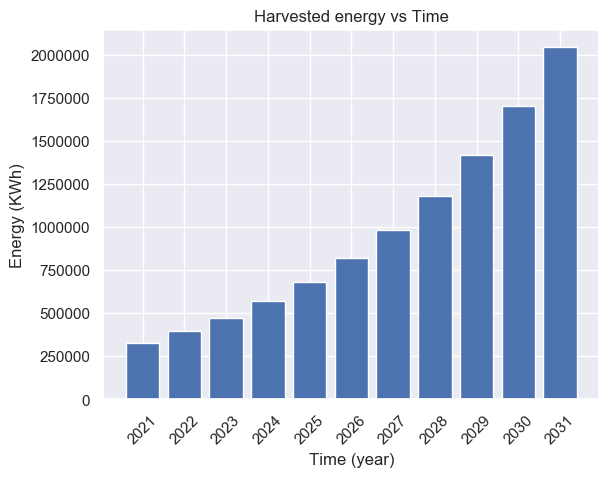

In [188]:
bar_labels = [i for i in range(2021, 2032)]

plt.bar(total_energy_2021to2031["year"], total_energy_2021to2031["J to KWh"])
plt.xlabel("Time (year)")
plt.ylabel("Energy (KWh)")
plt.title("Harvested energy vs Time")
plt.xticks(total_energy_2021to2031["year"], bar_labels, rotation=45);

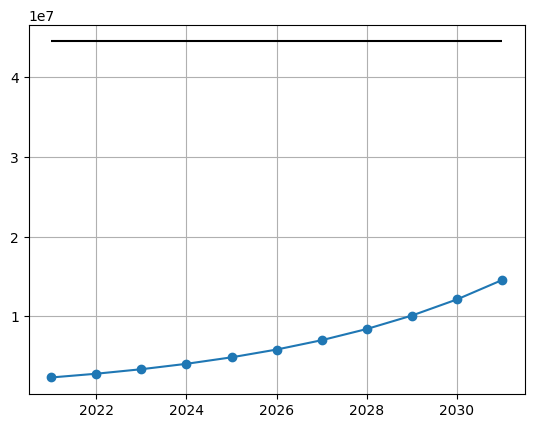

In [124]:
plt.plot(total_energy_2021to2031["year"], total_energy_2021to2031["energy harvested/km in BDT"], "-o")
plt.hlines(390*113970, xmin=2021, xmax=2031)
plt.grid();

In [132]:
eqn_df = total_energy_2021to2031[["year", "energy harvested/km in BDT"]]
eqn_df["year"] = eqn_df["year"] - 2020

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [159]:
target = 390 * 113970

co-ef:  [[ 0.00000000e+00  3.57184889e+05  3.25778203e+04  1.97109421e+03
   9.26001696e+01  2.83769173e+00  1.52550712e-01 -1.02179854e-03
   1.86962511e-04]]
rmse = 0.023007366244917244
R^2 = 1.0


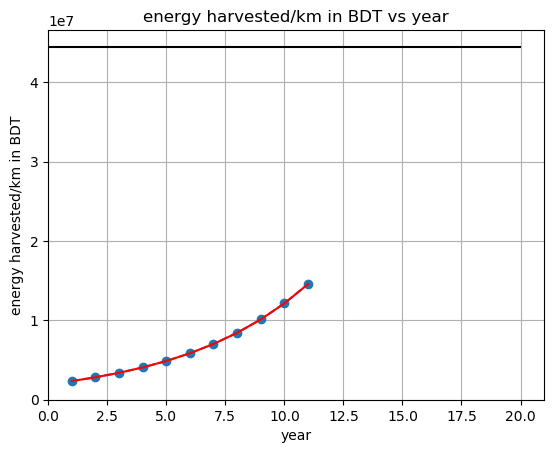

In [161]:
X = eqn_df["year"].values.reshape(-1, 1)
y = eqn_df["energy harvested/km in BDT"].values.reshape(-1, 1)

# x_poly
poly_features = PolynomialFeatures(degree=8)
x_poly = poly_features.fit_transform(X)

# y_poly
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
print("co-ef: ", model.coef_)

# Draw
plt.plot(eqn_df["year"], eqn_df["energy harvested/km in BDT"], "--o")
plt.plot(X, y_poly_pred, color='r')
# target value
plt.hlines(target, xmin=0, xmax=20)

plt.xlim(xmin=0)
plt.ylim(ymin=0)

plt.xlabel("year")
plt.ylabel("energy harvested/km in BDT")
plt.title("energy harvested/km in BDT vs year")
plt.grid();

# print rmse, R^2
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(f"rmse = {rmse}")
print(f"R^2 = {r2}")

In [174]:
count = 1
X_axis = []
y_axis = []
reached = 0
while(True):
    x_test = poly_features.fit_transform([[count]])
    ans = model.predict(x_test)
    if(ans[0][0] > target):
        reached += 1
    if(reached == 3):
        break
    X_axis.append(count)
    y_axis.append(ans[0][0])
    count += 1
print(count)

20


In [181]:
import seaborn as sns
sns.set()

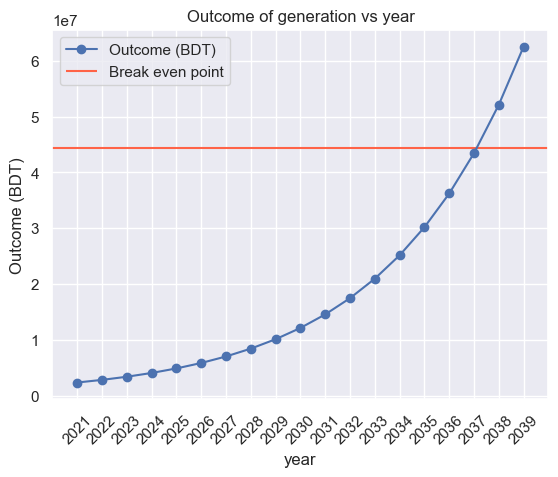

In [185]:
labels = [i+2020 for i in X_axis]

plt.plot(X_axis, y_axis, "-o", label="Outcome (BDT)")
plt.xlim(0, 20)
plt.xlabel("year")
plt.ylabel("Outcome (BDT)")
plt.title("Outcome of generation vs year")
plt.xticks(X_axis, labels, rotation=45)
plt.hlines(target, xmin=0, xmax=20, label="Break even point", color="tomato")
plt.legend();

In [164]:
x = 11
my_eqn = 1.86962511e-04*(x**8) + -1.02179854e-03*(x**7) + 0.152550712*(x**6) + 2.83769173*(x**5) + 0.926001696*(x**4) + 1.97109421e+03*(x**3) + 3.25778203e+04*(x**2) + 3.57184889e+05*x
my_eqn

11255465.114121176